En este proyecto nos centraremos mas en implementar algoritmos de ML

# 1. Entender el problema y definir el objetivo



1. **Identificar factores de riesgo**: Analizar las características de los pacientes para detectar los factores que más influyen en la ocurrencia de accidentes cardiovasculares, como la edad, el peso, el consumo de alcohol, y otros indicadores clínicos.
  
2. **Predecir la probabilidad de un accidente cardiovascular**: Utilizando técnicas de machine learning, el objetivo sería construir un modelo que pueda predecir si un paciente está en alto riesgo de sufrir un accidente cardiovascular en el futuro, basándose en los datos disponibles.


SELECCIONAREMOS EL PUNTO DOS COMO OBJETIVO DE ESTE PROYECTO

#### Objetivo: Predecir la probabilidad de un accidente cardiovascular 

Se espera entregar un modelo que sea capaz de predecir la probabilidad de un accidente cardiavascular para nuevas observaciones en funcion de algunas otras

Tras observar las caracteristica y haberlas estudiado, se concluye que la variable objetivo es stroke indica que un paciente ha tenido o no un accidente derebrovascular, donde:

- 1 significa que la persona tiene riesgo de tener un accidente cerebrovascular

- 0 significa que la persona no tiene riesgo de tener un accidente cerebrovascular


Una posible solucion al problema es implemenmtar un algoritmo de clasificacion que prediga la probabilidad de tener ceros y unos (de que pueda o no sufrir un accidente cerebrovascular). Estamos ante una clasificacion binaria, no continua ni milticlase

holaaaaaaaaa

# 2. Cargar librerías y el dataset

In [1]:
#Cargar librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nombramos a la base de datos y le pasamos la ruta de acceso
df_original = pd.read_csv("prediccion de accidentes cardiovasculares.csv")
df_original

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### 2.1.-Entendemos cada caracteristica de la base de datos:

El conjunto de datos contiene las siguientes columnas:

1. **id**: Un identificador único para cada individuo.

2. **gender (género)**: El género de la persona (por ejemplo, Hombre, Mujer).

3. **age (edad)**: La edad de la persona.

4. **hypertension (hipertensión)**: Indica si la persona tiene hipertensión (1 para sí, 0 para no).

5. **heart_disease (enfermedad cardíaca)**: Indica si la persona tiene una enfermedad cardíaca (1 para sí, 0 para no).

6. **ever_married (alguna vez casado/a)**: Indica si la persona ha estado casada alguna vez (Sí o No).

7. **work_type (tipo de trabajo)**: El tipo de trabajo en el que la persona está empleada (por ejemplo, Privado, Autónomo).

8. **Residence_type (tipo de residencia)**: El tipo de residencia de la persona (por ejemplo, Urbana, Rural).

9. **avg_glucose_level (nivel promedio de glucosa)**: El nivel promedio de glucosa de la persona.

10. **bmi (IMC)**: El índice de masa corporal (IMC) de la persona.

11. **smoking_status (estado de fumador)**: El estado de fumador de la persona (por ejemplo, exfumador, nunca ha fumado, fuma).

12. **stroke (accidente cerebrovascular)**: Indica si la persona ha sufrido un accidente cerebrovascular (1 para sí, 0 para no). 

In [5]:
print(type(df_original))

<class 'pandas.core.frame.DataFrame'>


# 3. Explorar el dataset:

### 3.1.- Inspeccion de datos

Para esta parte es importante disponer de un experto en el tema o hacer una investigacion exhaustiva debido a que se obtendrán conclusiones de cierta informacion de los datos y no deben ser erradas

In [ ]:
df_original

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#tamaño del df
df_original.shape

(5110, 12)

In [ ]:
#columnas
df_original.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
# Contar las categorías de la variable 'Variable'
conteo_categorias = df_original['stroke'].value_counts()

print(conteo_categorias)

stroke
0    4861
1     249
Name: count, dtype: int64


### 3.2.- Deteccion de valores nulos, duplicados y atipicos

In [ ]:
#¿hay data nula?
df_original.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


lo que hace ***df_original.isnull().sum()*** es identificar los valores nulos de cada comulna y despues sumarlos para cada columna.

df_original.isnull(): Devuelve un DataFrame del mismo tamaño que df_original, pero con valores booleanos (True donde hay valores nulos y False donde no los hay).

.sum(): Aplica la suma a lo largo de cada columna, contando cuántos valores nulos (True) hay en cada una (en pandas, True se considera como 1 y False como 0).

Como tenemos varias columnas con datos tipo string, tendremos que codificarlos para el modelo de aprendizaje automatico

In [3]:
#examinar duplicados
num_duplicados = df_original.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")


Número de filas duplicadas: 0


In [5]:
df_original.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

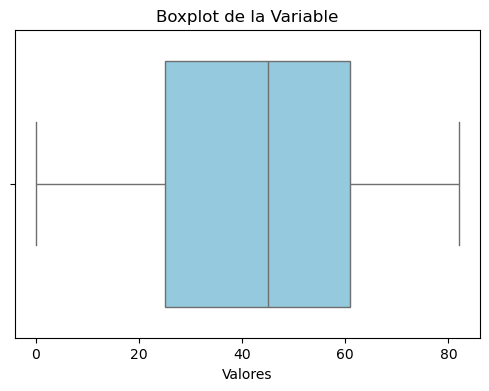

In [15]:
#valores atipicos
# Crear el boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_original["age"], color="skyblue")

# Mostrar el gráfico
plt.title("Boxplot de la age")
plt.xlabel("Valores")
plt.show()

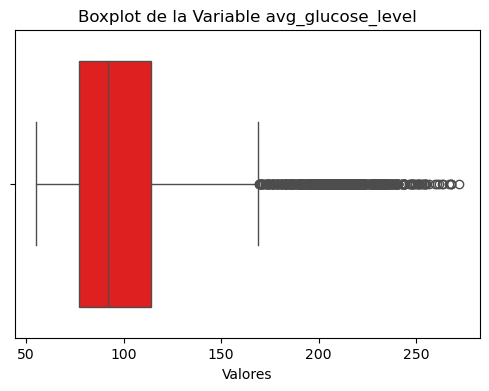

In [18]:
# Crear el boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_original["avg_glucose_level"], color="red")

# Mostrar el gráfico
plt.title("Boxplot de la Variable avg_glucose_level")
plt.xlabel("Valores")
plt.show()

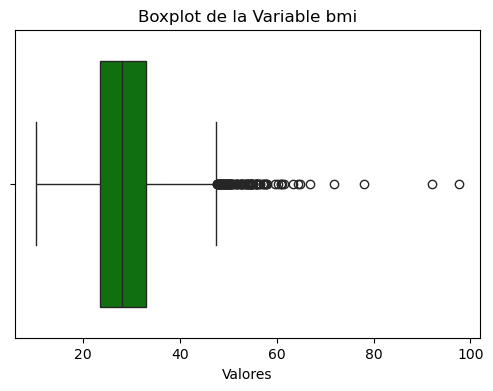

In [19]:
# Crear el boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_original["bmi"], color="green")

# Mostrar el gráfico
plt.title("Boxplot de la Variable bmi")
plt.xlabel("Valores")
plt.show()

Vemos que en la variable bmi y avg_glucose_level hay muchos valores atipicos y el rango de edaddes es de 27 a 60 años aprox

### 3.3.- Data categorica

In [4]:
#conteo de categorias
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3.4.- analisis de datos numericos

In [6]:
#Estadistica descritiva univariada para el dataset
df_original.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df_original

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


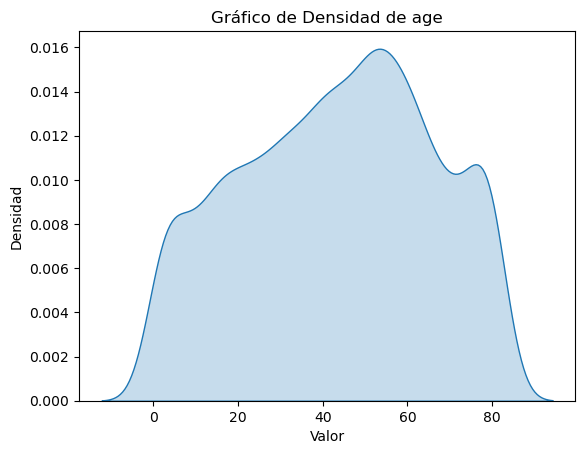

In [9]:
sns.kdeplot(df_original['age'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de age')
plt.show()


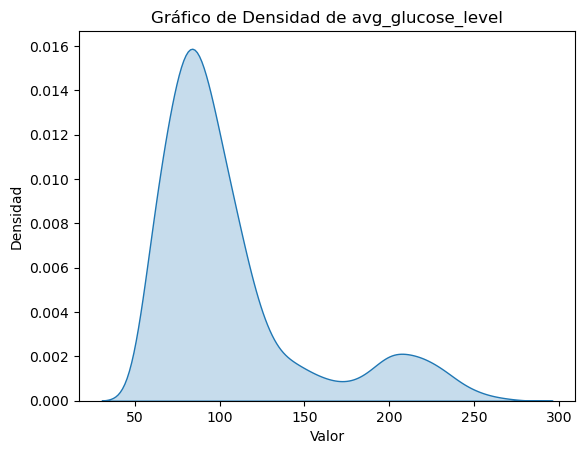

In [14]:
sns.kdeplot(df_original['avg_glucose_level'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de avg_glucose_level')
plt.show()


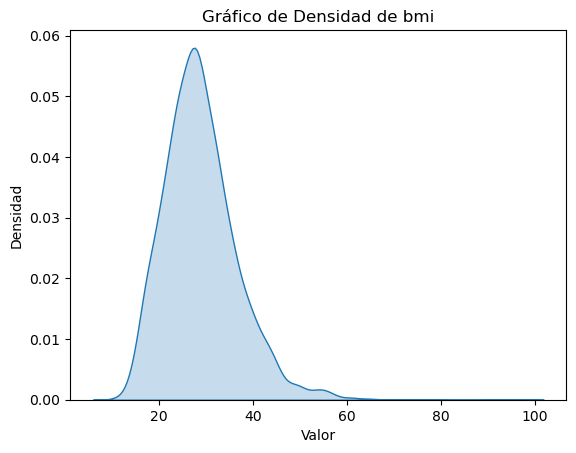

In [15]:
sns.kdeplot(df_original['bmi'], fill=True)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de bmi')
plt.show()


Vemos que ninguna variable continua tiene distribucion normal, la ultima bmi parece ser que si, pero el sezgo es evidente a la derecha

### Que tipo de limpieza se debe hacer?

Dado que nuestro objetivo es predecir las probabilidades binarias, tenemos que usar un clasificacdor binario, los posibles a usar:

- Regresion logistica

Nesecitamos hacer la siguiente limpieza o considerarlas dadas las caracteristicas del dataset:

- 1 Estudiar la data nula en bmi
- 2 Estudiar los valores atipicos en las 2 variables correspondientes (como impactan en el modelo)
- 3 Transformacion de datos categoricos con variables dummy
- 4 Considerar escalar variables
- 5 Ver correlaciones y evitar la multicolinealidad

# 4. Preparar los datos (impiar, organizar y hacer visualizaciones)

In [24]:
df_original.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#3eliminamos la columna id
df_original = df_original.drop(columns=df_original.columns[0])
df_original.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1. BMI

In [7]:
#Estudiamos la data nula en bmi, ¿que metodo usamos para rellenar, la quitamos?
#Calculamos el porcentaje de datos que faltan en bmi
print("el tamaño es: ", df_original.shape)
print("el total de datos son 5110 y en bmi flatan 281, por lo tanto, el porcentaje de valores nulos en bmi es: " , 281*100/5110, "%")

el tamaño es:  (5110, 12)
el total de datos son 5110 y en bmi flatan 281, por lo tanto, el porcentaje de valores nulos en bmi es:  5.499021526418787 %


Ya que solo representa el 5.5 % de toda la data en esa columna la imputaremos:

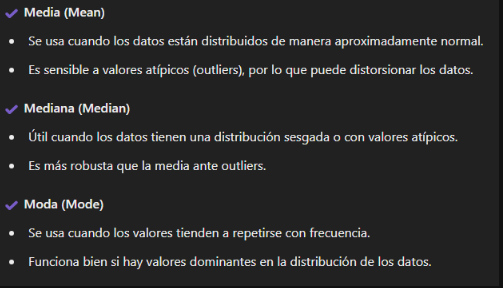

#### 1.1. Para ver si agrergamos la media

Para saber si es tiene distribucion nmormal:

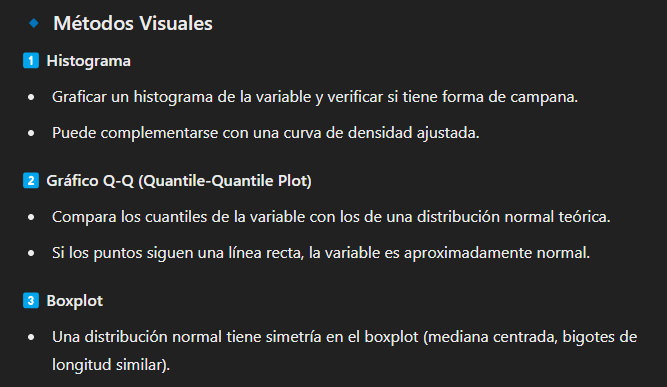

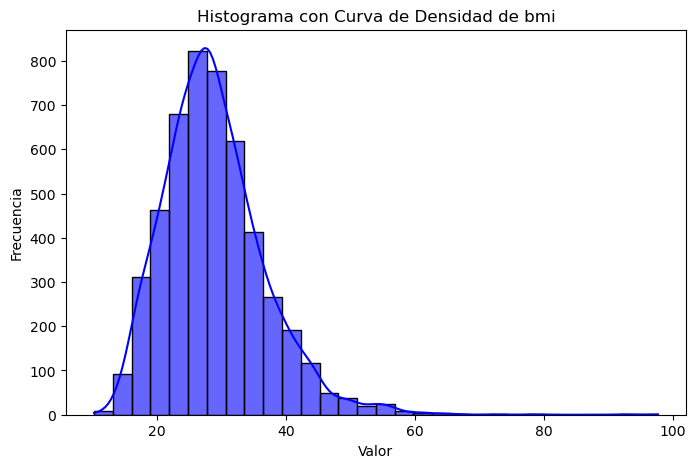

In [8]:
#histograma
# Crear el histograma con la curva de densidad
plt.figure(figsize=(8, 5))
sns.histplot(df_original["bmi"], bins=30, kde=True, color="blue", alpha=0.6)

# Configurar etiquetas y título
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma con Curva de Densidad de bmi")

# Mostrar el gráfico
plt.show()

Aqui se ve la forma de campana o gaussiana que tiene la distribucion; es normal

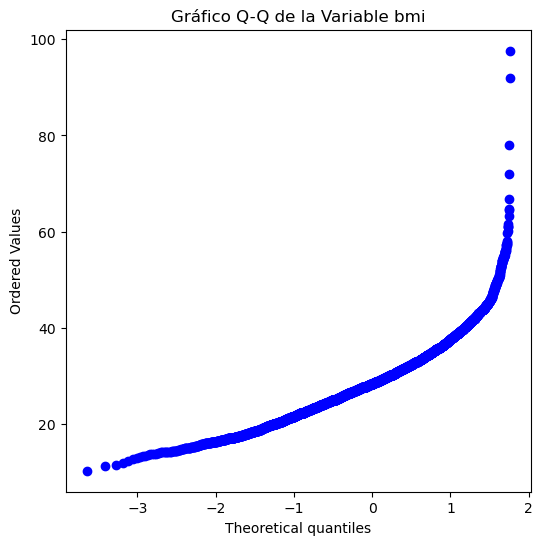

In [12]:
#grafico q-q
import scipy.stats as stats
# Crear gráfico Q-Q (Quantile-Quantile Plot)
plt.figure(figsize=(6, 6))
stats.probplot(df_original['bmi'], dist="norm", plot=plt)

# Configurar título
plt.title("Gráfico Q-Q de la Variable bmi")

# Mostrar el gráfico
plt.show()

La distribución de la variable bmi no se puede considerar aproximadamente normal.

El gráfico Q-Q muestra una clara desviación de la normalidad:

En los extremos, los puntos se alejan significativamente de la línea teórica, lo que indica colas más pesadas o asimetría.
En la parte central, los datos siguen la línea teórica, pero la desviación en las colas sugiere que la distribución tiene valores atípicos o es sesgada.

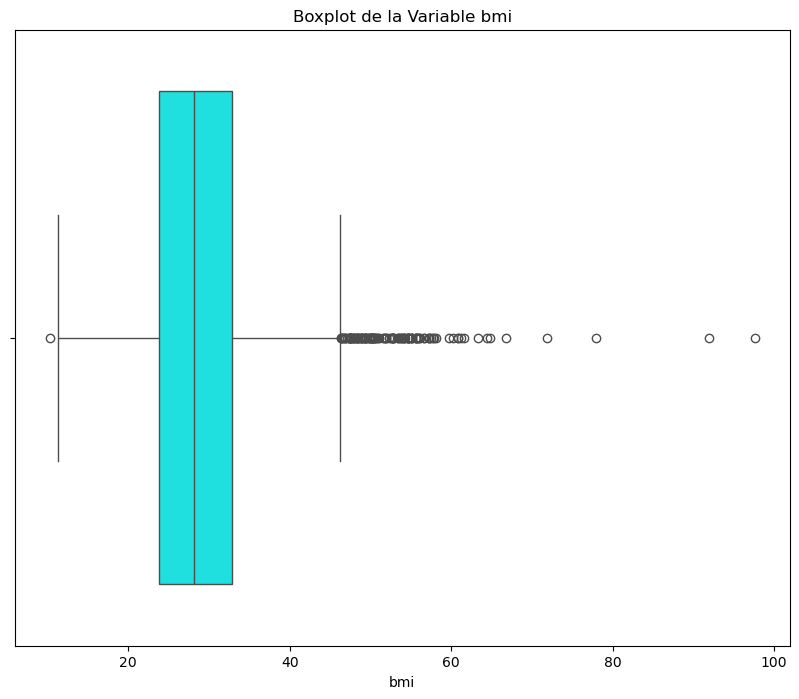

In [11]:
#boxplot
# Crear un boxplot para visualizar la simetría de la distribución
plt.figure(figsize=(10,8))
sns.boxplot(x=df_original['bmi'], color="cyan")

# Configurar título
plt.title("Boxplot de la Variable bmi")

# Mostrar el gráfico
plt.show()

El boxplot confirma lo que se veía en el gráfico Q-Q: la variable bmi no sigue una distribución normal.

Observaciones clave:

Asimetría positiva: La caja y la mediana están desplazadas hacia la izquierda, con una cola larga hacia la derecha.
Presencia de valores atípicos: Hay muchos outliers (puntos fuera del bigote derecho), lo que indica que la distribución tiene colas pesadas o una asimetría significativa.

### Conclusion para la media:
Como la vaariable bmi no sigue una distribucion normal y hay valores atipicos, aplicar la media seria contraproducente

#### 1.2. Vemos si conviene la mediana

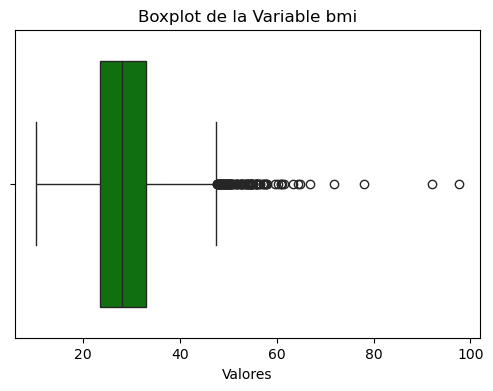

In [14]:
#Valores atipicos de bmi
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_original["bmi"], color="green")

# Mostrar el gráfico
plt.title("Boxplot de la Variable bmi")
plt.xlabel("Valores")
plt.show()


In [19]:
# Cálculo del IQR
Q1 = df_original['bmi'].quantile(0.25)
Q3 = df_original['bmi'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartílico (IQR) 

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contabilizar los valores atípicos
outliers = df_original[(df_original['bmi'] < lower_bound) | (df_original['bmi'] > upper_bound)]
num_outliers = outliers.shape[0]
total_values = df_original['bmi'].shape[0]
percent_outliers = (num_outliers / total_values) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%")



Número de valores atípicos: 110
Porcentaje de valores atípicos: 2.15%


Vemos que, a pesar de no tener una cantidad significativa de outliers, si los hay, y agregar la media es peor. Por lo tanto usaremos la mediana

#### 1.3. Para la moda

In [21]:
moda_bmi=df_original["bmi"].mode()
moda_bmi

0    28.7
Name: bmi, dtype: float64

In [23]:
frecuencia_moda = df_original['bmi'].value_counts()[moda_bmi]
frecuencia_moda

bmi
28.7    41
Name: count, dtype: int64

vemos que no hay unn valor dominante en la moda ya que de 5110 datos, se repite solo 41 veces el 28.7

In [4]:
#agregamos la mediana en los valores nulos de bmi
df_original["bmi"].fillna(df_original["bmi"].median(), inplace=True)

C:\Users\Fernando\AppData\Local\Temp\ipykernel_7704\2751035657.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_original["bmi"].fillna(df_original["bmi"].median(), inplace=True)


In [5]:
df_original.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df_original.isna().sum() #ya no hay data nula

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 2. Estudiar los valores atipicos en las 3 variables correspondientes (como impactan en el modelo)

bmi y avg_glucose_level

Recordemos que scikit learn no acepta valores nulos ni datos categoricos, es decir, la dats ya esta relativamente limpia, el analisis de valores atipicos es para que el modelo sea mejor ya que usaremos regresion logistica que si es sensible ya que aprende los coeficientes 
𝑤
w mediante máxima verosimilitud, lo que implica que valores extremos pueden influir significativamente en la optimización.

In [9]:
#porcentaje de atipicos en bmi
# Cálculo del IQR
Q1 = df_original['bmi'].quantile(0.25)
Q3 = df_original['bmi'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartílico (IQR) 

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contabilizar los valores atípicos
outliers = df_original[(df_original['bmi'] < lower_bound) | (df_original['bmi'] > upper_bound)]
num_outliers = outliers.shape[0]
total_values = df_original['bmi'].shape[0]
percent_outliers = (num_outliers / total_values) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%")

Número de valores atípicos: 126
Porcentaje de valores atípicos: 2.47%


In [12]:
#porcentaje de atipicos en avg_glucose_level
# Cálculo del IQR
Q1 = df_original['avg_glucose_level'].quantile(0.25)
Q3 = df_original['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartílico (IQR) 

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contabilizar los valores atípicos
outliers = df_original[(df_original['avg_glucose_level'] < lower_bound) | (df_original['avg_glucose_level'] > upper_bound)]
num_outliers = outliers.shape[0]
total_values = df_original['avg_glucose_level'].shape[0]
percent_outliers = (num_outliers / total_values) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%")

Número de valores atípicos: 627
Porcentaje de valores atípicos: 12.27%


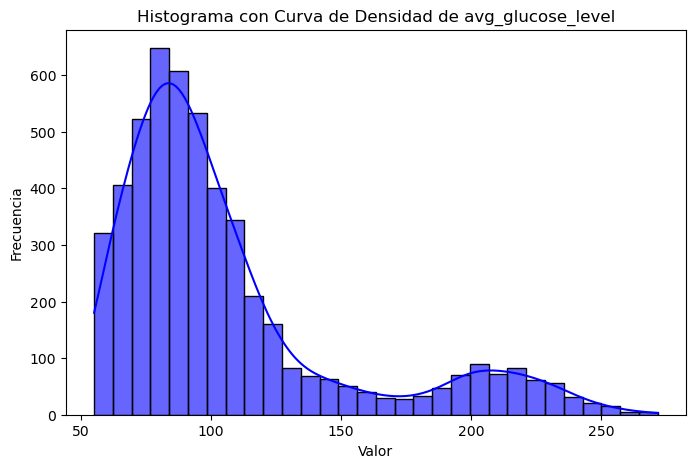

In [13]:
#distribucion de avg_glucose_level # Crear el histograma con la curva de densidad
plt.figure(figsize=(8, 5))
sns.histplot(df_original["avg_glucose_level"], bins=30, kde=True, color="blue", alpha=0.6)

# Configurar etiquetas y título
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.title("Histograma con Curva de Densidad de avg_glucose_level")

# Mostrar el gráfico
plt.show()


como la dsitribucion de avg_glucose_level y bmi no es normal, usaremos la mediana para reemplazar los valores atipicos

In [8]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df_original['bmi'].quantile(0.25)
Q3 = df_original['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Calcular la mediana
mediana = df_original['bmi'].median()

# Reemplazar valores atípicos por la mediana
df_original['bmi'] = np.where((df_original['bmi'] < limite_inferior) | (df_original['bmi'] > limite_superior), 
                         mediana, 
                         df_original['bmi'])



In [17]:
#porcentaje de atipicos en bmi
# Cálculo del IQR
Q1 = df_original['bmi'].quantile(0.25)
Q3 = df_original['bmi'].quantile(0.75)
IQR = Q3 - Q1 #rango intercuartílico (IQR) 

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contabilizar los valores atípicos
outliers = df_original[(df_original['bmi'] < lower_bound) | (df_original['bmi'] > upper_bound)]
num_outliers = outliers.shape[0]
total_values = df_original['bmi'].shape[0]
percent_outliers = (num_outliers / total_values) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%")

Número de valores atípicos: 37
Porcentaje de valores atípicos: 0.72%


In [9]:
# Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df_original['avg_glucose_level'].quantile(0.25)
Q3 = df_original['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Calcular la mediana
mediana = df_original['avg_glucose_level'].median()

# Reemplazar valores atípicos por la mediana
df_original['avg_glucose_level'] = np.where(
    (df_original['avg_glucose_level'] < limite_inferior) | 
    (df_original['avg_glucose_level'] > limite_superior), 
    mediana, 
    df_original['avg_glucose_level']
)




In [20]:
# Porcentaje de atípicos en avg_glucose_level
# Cálculo del IQR
Q1 = df_original['avg_glucose_level'].quantile(0.25)
Q3 = df_original['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1  # Rango intercuartílico (IQR)

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contabilizar los valores atípicos
outliers = df_original[(df_original['avg_glucose_level'] < lower_bound) | 
                        (df_original['avg_glucose_level'] > upper_bound)]
num_outliers = outliers.shape[0]
total_values = df_original['avg_glucose_level'].shape[0]
percent_outliers = (num_outliers / total_values) * 100

print(f"Número de valores atípicos: {num_outliers}")
print(f"Porcentaje de valores atípicos: {percent_outliers:.2f}%")


Número de valores atípicos: 102
Porcentaje de valores atípicos: 2.00%


En este punto ya no tenemos data nula y rediujimos significativamente el porcentaje de valores atipicos

### 3. Ahora codificamos las variables dummy

In [20]:
df_original.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


las variables que deben ser codificadas son:

- gender

- ever_married 

- work_type

- recidence_type

- smoking_status

In [16]:
for i in df_original:
    num_categorias = df_original[i].nunique()
    print(f'Este es el numero de categorias: {num_categorias}, en la columna {i}') 

Este es el numero de categorias: 3, en la columna gender
Este es el numero de categorias: 104, en la columna age
Este es el numero de categorias: 2, en la columna hypertension
Este es el numero de categorias: 2, en la columna heart_disease
Este es el numero de categorias: 2, en la columna ever_married
Este es el numero de categorias: 5, en la columna work_type
Este es el numero de categorias: 2, en la columna Residence_type
Este es el numero de categorias: 3979, en la columna avg_glucose_level
Este es el numero de categorias: 418, en la columna bmi
Este es el numero de categorias: 4, en la columna smoking_status
Este es el numero de categorias: 2, en la columna stroke


Como las variables dummy generan k-1 columnas o variables nuevas para k el numero de categorias en cada columna:

- Gender generara 2 columnas nuevas

- ever_married 1

- wor_type 4

- recidence_type 1

- smoking_status 3


 Al quedarnos con k-1 variables se elimina automaticamente la multicolinealidad, habria multicolinealidad si nos quedamos con k columnas despues de codificar
 

es decir, al final debemos tener  numero de columnas originalmente numerica + suma de dummyes de todas las columnas inicialmente categoricas:







In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


6 + 2+1+4+1+3

In [19]:
print("Numero de columnas tras codificar:", 6+2+1+4+1+3)

Numero de columnas tras codificar: 17


In [11]:
del df_encoded#eliminar esa variable

NameError: name 'df_encoded' is not defined

In [12]:
df_original.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df_dummies = pd.get_dummies(df_original[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]], drop_first=True, dtype=int)

In [8]:
print(df_dummies.head()) 

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     

In [6]:
# Unir las columnas dummy con el DataFrame original
df_final = pd.concat([df_original, df_dummies], axis=1)

# Eliminar las columnas categóricas originales si ya no las necesitas
df_final = df_final.drop(["gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis=1)

In [8]:
df_final = pd.DataFrame(df_final)

In [9]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [10]:
df_final.shape

(5110, 17)

In [12]:
type(df_final)

pandas.core.frame.DataFrame

In [8]:
# Verificar los tipos de datos de cada columna en df_final
print(df_final.dtypes)

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                         int32
gender_Other                        int32
ever_married_Yes                    int32
work_type_Never_worked              int32
work_type_Private                   int32
work_type_Self-employed             int32
work_type_children                  int32
Residence_type_Urban                int32
smoking_status_formerly smoked      int32
smoking_status_never smoked         int32
smoking_status_smokes               int32
dtype: object


In [23]:
print(type(df_final))

<class 'pandas.core.frame.DataFrame'>


Efectivamente son 17 columnas

In [11]:
#correlaciones 
# Matriz de correlación
correlation_matrix = df_final.corr()
display(correlation_matrix)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110,-0.026310,-0.011743,0.334911,-0.028327,0.203886,0.070160,-0.442102,-0.000277,0.103533,0.107636,0.084392
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.026310,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011743,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.334911,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028327,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


tras examinar toda la tabla, vemos que no hay multicolinelidad entre variables; toda la informacion es relevante

In [12]:
#covarianzas
covariance_matrix = df_final.cov()
display(covariance_matrix)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,511.331792,1.853816,1.348494,243.882731,56.462308,1.194146,-0.307679,-3.371817e-03,7.295001,-1.164583e-01,1.303808,2.721159,-4.892676,0.160319,2.027294,1.302847,0.597612
hypertension,1.853816,0.087976,0.007262,2.343429,0.361501,0.008169,0.003108,-1.907535e-05,0.023142,-4.196577e-04,-0.000794,0.012563,-0.013105,-0.001174,0.006606,0.009319,0.003348
heart_disease,1.348494,0.007262,0.051104,1.656923,0.064255,0.006567,0.009545,-1.057188e-05,0.012311,-2.325814e-04,0.000003,0.007196,-0.007067,0.000349,0.005715,-0.002386,0.003598
avg_glucose_level,243.882731,2.343429,1.656923,2050.600820,58.183489,1.286527,1.217436,7.277808e-03,3.335696,-4.351319e-02,0.371661,1.041627,-1.579656,-0.111975,1.167251,0.522315,0.288754
bmi,56.462308,0.361501,0.064255,58.183489,59.283260,0.059866,-0.099786,-1.264834e-03,1.224955,-1.428162e-02,0.776717,0.198198,-1.161307,-0.001065,0.301683,0.400221,0.234812
stroke,1.194146,0.008169,0.006567,1.286527,0.059866,0.046363,0.000967,-9.537676e-06,0.011081,-2.098289e-04,0.001267,0.004911,-0.006161,0.001664,0.005260,-0.000429,0.000696
gender_Male,-0.307679,0.003108,0.009545,1.217436,-0.099786,0.000967,0.242633,-8.101279e-05,-0.007005,3.707819e-04,-0.007955,-0.004694,0.015004,-0.001462,0.007967,-0.023505,0.002043
gender_Other,-0.003372,-0.000019,-0.000011,0.007278,-0.001265,-0.000010,-0.000081,1.956947e-04,-0.000128,-8.426862e-07,0.000084,-0.000031,-0.000026,-0.000099,0.000162,-0.000072,-0.000030
ever_married_Yes,7.295001,0.023142,0.012311,3.335696,1.224955,0.011081,-0.007005,-1.284330e-04,0.225657,-2.825527e-03,0.036156,0.033588,-0.088233,0.001487,0.030788,0.023593,0.018063
work_type_Never_worked,-0.116458,-0.000420,-0.000233,-0.043513,-0.014282,-0.000210,0.000371,-8.426862e-07,-0.002826,4.287587e-03,-0.002465,-0.000690,-0.000579,0.000748,-0.000746,0.001146,-0.000665


Como las variables dummy generan k-1 columnas o variables nuevas para k el numero de categorias en cada columna:

- Gender generara 2 columnas nuevas

- ever_married 1

- wor_type 4

- recidence_type 1

- smoking_status 3


 Al quedarnos con k-1 variables se elimina automaticamente la multicolinealidad, habria multicolinealidad si nos quedamos con k columnas despues de codificar
 

es decir, al final debemos tener  numero de columnas originalmente numerica + suma de dummyes de todas las columnas inicialmente categoricas:







Por ultimo, consideramos la escalabilidad

In [26]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [11]:
#observamos los ranfos en los uqe se encuentran las variables
df_final.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ya que las ecalas de las variables son diferentes y el modelo de regresion logistica se basa en distancias, vamos a normalizar

# 5.- Visualizaciones

Esta parte se omite poruqe el interes es implementar mododelos de aprendizaje automatico

# 6.- Modelado y evaluacion inicial

¿que modelos pueden ayudarnos a conseguir nuestro objetivo?

Tipo de dato que queremos predecir: Numerico binario (0 y 1) que representa la probabilidad de tener un accidente cardiovascular. Stroke

Tipo de dato de entrada: variable multivariante numerica y ademas normalizada.

Utilizaremos:

Regresión logística

KNN (K-Nearest Neighbors)

SVM (Support Vector Machine)

Regresión Logística 📊

    Es un modelo lineal utilizado para clasificación binaria.
    
    Produce probabilidades y permite interpretar fácilmente la relación entre las variables de entrada y la probabilidad de un evento.
    
    Funciona bien si los datos son linealmente separables.
    
    Si los datos son altamente no lineales, su desempeño será limitado.

K-Nearest Neighbors (KNN) 🔍

    Es un algoritmo basado en proximidad que clasifica un punto según la mayoría de sus vecinos más cercanos.
    
    No asume ninguna relación específica entre las variables, por lo que puede capturar patrones no lineales.
    
    Sensible al ruido y a la escala de las variables, por lo que requiere normalización.
    
    Puede ser computacionalmente costoso si el conjunto de datos es grande.

Support Vector Machine (SVM) ⚖️

    Busca encontrar un hiperplano que maximice la separación entre clases en un espacio de alta dimensión.
    
    Puede manejar datos no lineales con el uso de kernels (por ejemplo, RBF o polinómicos).
    
    Es robusto contra el sobreajuste en datasets de tamaño moderado.
    
    Puede ser computacionalmente costoso en grandes conjuntos de datos.


## 6.0.- Preprocesamos los datos para los modelos

In [11]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [7]:
#mover variable objetivo al final
def move_column_to_end(df_final, column_name):
    col = df_final.pop(column_name)
    df_final[column_name] = col
    return df_final

df = move_column_to_end(df_final, 'stroke')

In [15]:
df_final.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,0,1,91.885,36.6,1,0,1,0,1,0,0,1,1,0,0,1
1,61.0,0,0,91.885,28.1,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,0,1,105.920,32.5,1,0,1,0,1,0,0,0,0,1,0,1
3,49.0,0,0,91.885,34.4,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,1,0,91.885,24.0,0,0,1,0,0,1,0,0,0,1,0,1


In [14]:
# Contar las categorías de la variable 'Variable'
conteo_categorias = df_final['stroke'].value_counts()

print(conteo_categorias)

stroke
0    4861
1     249
Name: count, dtype: int64


### El dataset esta desbalanceado!!!!

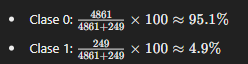



In [16]:
df_final.shape

(5110, 17)

In [8]:
#Definimos las variables
X = df_final.iloc[:, :-1] 
y = df_final.iloc[:, -1]

In [15]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,1,0,1,0,1,0,0,0,1,0,0


In [16]:
X.shape

(5110, 16)

In [23]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [15]:
y.shape

(5110,)

In [12]:
X.values

array([[67.,  0.,  1., ...,  1.,  0.,  0.],
       [61.,  0.,  0., ...,  0.,  1.,  0.],
       [80.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [35.,  0.,  0., ...,  0.,  1.,  0.],
       [51.,  0.,  0., ...,  1.,  0.,  0.],
       [44.,  0.,  0., ...,  0.,  0.,  0.]])

In [13]:
y.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
#dividimos el conjunto de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4505,60.00,1,0,234.50,43.7,0,0,1,0,1,0,0,1,0,1,0
3576,41.00,0,0,83.97,28.5,1,0,1,0,1,0,0,0,1,0,0
3032,52.00,0,0,87.51,30.5,1,0,1,0,1,0,0,1,1,0,0
1867,55.00,0,0,63.47,27.8,0,0,1,0,1,0,0,0,0,0,0
494,55.00,0,0,111.19,39.7,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,43.00,0,0,88.00,30.6,1,0,1,0,0,0,0,0,0,1,0
466,61.00,1,0,170.05,60.2,0,0,1,0,1,0,0,0,0,0,1
3092,1.16,0,0,97.28,17.8,0,0,0,0,0,0,1,1,0,0,0
3772,80.00,0,0,196.08,31.0,1,0,1,0,0,1,0,0,1,0,0


In [18]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4688,31.0,0,0,64.85,23.0,1,0,0,0,0,1,0,0,0,0,0
4478,40.0,0,0,65.29,28.3,1,0,1,0,0,1,0,0,0,1,0
3849,8.0,0,0,74.42,22.5,0,0,0,0,0,0,1,1,0,0,0
4355,79.0,1,0,76.64,19.5,0,0,1,0,0,1,0,0,0,1,0
3826,75.0,0,0,94.77,27.2,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,54.0,0,0,207.79,38.6,0,0,1,0,1,0,0,1,0,1,0
2437,8.0,0,0,105.63,19.2,1,0,0,0,0,0,1,1,0,0,0
3164,68.0,0,0,82.85,28.1,0,0,0,0,1,0,0,1,0,0,1
92,57.0,0,0,68.02,37.5,0,0,0,0,0,1,0,1,0,1,0


In [20]:
y_train

4505    0
3576    0
3032    0
1867    0
494     0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3832, dtype: int64

In [21]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
1533    0
2437    0
3164    0
92      1
4676    0
Name: stroke, Length: 1278, dtype: int64

Que tecnica de escalado conviene:

Como no hay presencia de valores atipicos podemos usar standardscale o minmaxscaler

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
X_train

array([[ 0.7372167 ,  3.1393509 , -0.24139427, ..., -0.46156484,
         1.30038888, -0.42617127],
       [-0.10654894, -0.31853719, -0.24139427, ...,  2.16654284,
        -0.76900073, -0.42617127],
       [ 0.38194696, -0.31853719, -0.24139427, ...,  2.16654284,
        -0.76900073, -0.42617127],
       ...,
       [-1.87579225, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073, -0.42617127],
       [ 1.62539105, -0.31853719, -0.24139427, ...,  2.16654284,
        -0.76900073, -0.42617127],
       [ 0.11549465, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073,  2.34647444]])

In [23]:
X_test

array([[-0.55063611, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073, -0.42617127],
       [-0.15095765, -0.31853719, -0.24139427, ..., -0.46156484,
         1.30038888, -0.42617127],
       [-1.57203662, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073, -0.42617127],
       ...,
       [ 1.09248644, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073,  2.34647444],
       [ 0.60399055, -0.31853719, -0.24139427, ..., -0.46156484,
         1.30038888, -0.42617127],
       [-0.68386227, -0.31853719, -0.24139427, ..., -0.46156484,
        -0.76900073,  2.34647444]])

## 6.1.- Regresion logistica

### 6.1.1- Modelo de regresion logistica sin procesar

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [19]:
#entrenar al modelo
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [20]:
#predecimos en el conjunto de test
y_pred  = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# representa las probabilidades predichas por el modelo de regresión logística para la clase positiva (es decir, la clase etiquetada como 1
y_prob = classifier.predict_proba(X_test)[:, 1]
y_prob

array([0.00421846, 0.005386  , 0.00372193, ..., 0.14010822, 0.02966206,
       0.00751914])

In [23]:
#matriz de confusion
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[1198    0]
 [  79    1]]


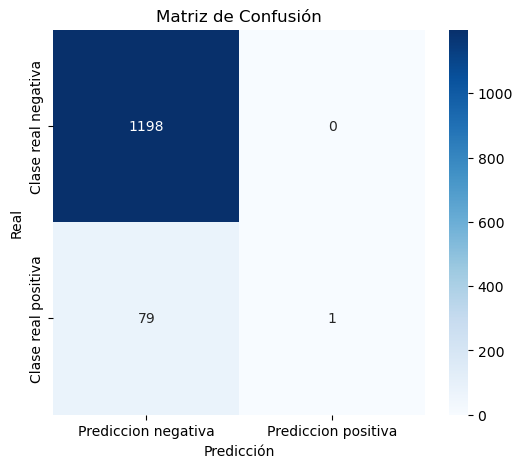

Matriz de Confusión:
[[1198    0]
 [  79    1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278



In [26]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediccion negativa', 'Prediccion positiva'], yticklabels=['Clase real negativa', 'Clase real positiva'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("\nReporte de Clasificación:")
print(report)

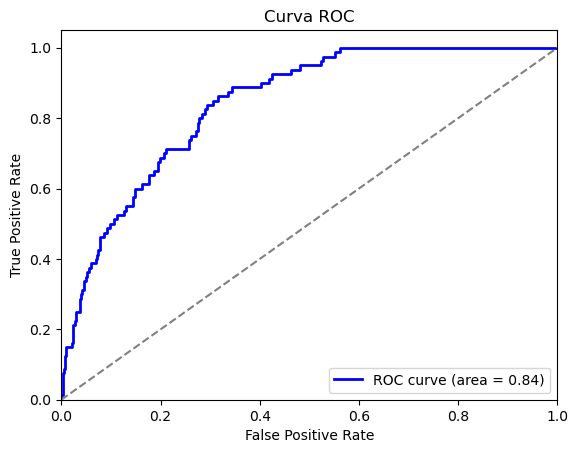

In [25]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


El codigo de abajo es el compacto de las tres celdas previas

In [15]:
"""#matriz de confusion, curva ROC y ROC AUC y reporte
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def evaluate_classification_model(classifier, X_test, y_test, class_labels):
    """
    Evalúa un modelo de clasificación mostrando métricas clave, matriz de confusión y curva ROC.
    
    Parámetros:
    - model: modelo de clasificación entrenado
    - X_test: conjunto de características de prueba
    - y_test: etiquetas reales de prueba
    - class_labels: nombres de las clases
    """
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else None
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión')
    plt.show()
    
    # Reporte de clasificación
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=class_labels))
    
    # Curva ROC si es un problema binario y el modelo tiene predict_proba
    if y_pred_proba is not None and len(class_labels) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title('Curva ROC')
        plt.legend(loc='lower right')
        plt.show()
    
    return cm"""


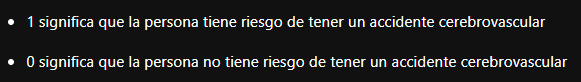

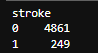

## Clase positiva: 1 hay riesgo

## Clase negativa: 0 no hay riesgo

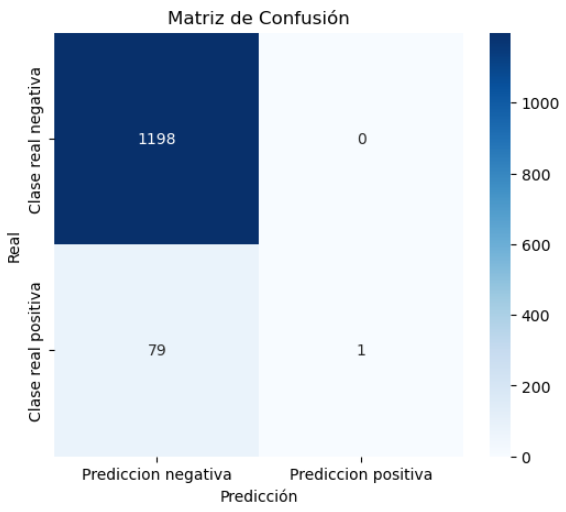

TP (entrada 2,2): El modelo predice correctamente los casos pisitivos (clase 1); predice correctamente que hay riesgo cuando efectivamente lo hay

TN (entrada 1,1 ): Cuando el modelo predice correctamente los casos negativos (clase 0); El modelo es bueno prediciendo los que efectivamente no tienen riesgo

FP (entrada1,2 ): Cuando el modelo predice mal los casos negativos; predice positivo cuando es negativo; predice que si hay riesgo cuando en realidad no lo hay

FN (entrada 2,1): Cuando el modelo predice mal los casos positivos; predice negativo cuando es positivo; el modelo predice que  no hay riesgo, cuando si lo hay (este es el que debemos minimizar al maximo)

### Analisis para la clase positiva; (clase positiva = 1)

In [27]:
#acuraccy global
#comparar acuraccy de entrenamiento y de test
from sklearn.metrics import accuracy_score

# Predicciones en el conjunto de entrenamiento
y_train_pred = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predicciones en el conjunto de prueba
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f}")

Accuracy en entrenamiento: 0.9559
Accuracy en prueba: 0.9382


    Accuracy en entrenamiento: 0.9559 (95.59%) → El modelo se desempeña muy bien en los datos con los que fue entrenado.
    
    
    Accuracy en prueba: 0.9382 (93.82%) → El modelo mantiene un buen desempeño en datos nuevos que no ha visto antes.


El modelo tiene una alta precision previo a ser entrenado (precision de entrenamiento), lo que indica que puede estar haciendo predicciones aleatorias o simplemente eligiendo a la clase mayoritaria "1".

        Accuracy en entrenamiento: 0.9559 (95.59%) → El modelo se desempeña muy bien en los datos con los que fue entrenado.
        
        
        Accuracy en prueba: 0.9382 (93.82%) → El modelo mantiene un buen desempeño en datos nuevos que no ha visto antes.



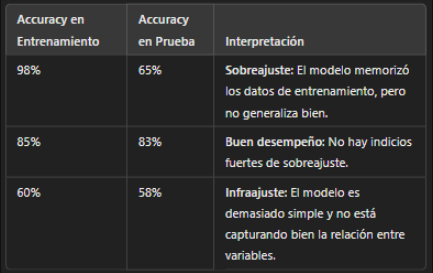

Para nuestro caso

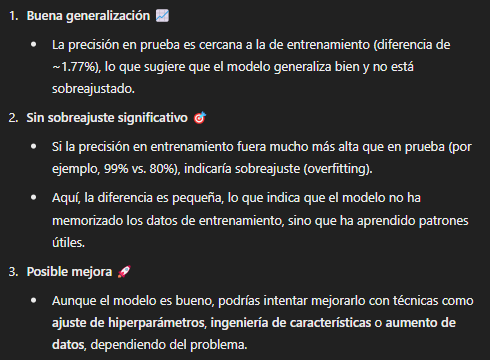

Es decir, podemos conlcuir que en general, el modelo generaliza bien y no esta sobreajustado, pero aun nos falta investigar como se comporta con ambas clases en las demas metricas



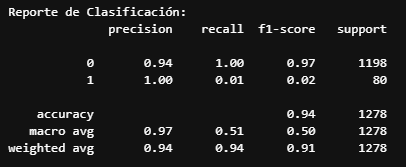

Precision de clase: 100 %

    De todos los que se detectó con "hay riesgo", el 100% realmente lo tienen; el modelo es extremadamente confiable cuando detecta a la clase uno (el problema es que casi nunca lo detecta)

Rcall: 1% 

    El 1% de los que realmente tenian riesgo, fueron identificados

F1 score: 0.02
    Indica que el modelo es malo detectando a la clase 1
    

### Analisis para la clase cero (clase negativa = 0)

Presicion de clase: 94%% 

    De todos los que se detectó con "no hay riesgo", el 94% de los predichos realmente tiene no tienen riesgo

Rcall: 100% 

    El 100% de los que realmente no tenian accidente, fueron identificados

F1 score: 97%
        quiere decir que el modelo es muy bueno identificando a la clase neagtiva


### ROC AUC

Significa que hay 84% de probabilidad de clasificar correctamente una instancia positiva frente a una negativa.

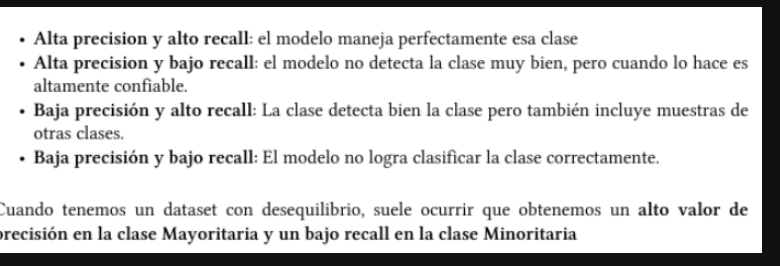


## Conclusion del modelo sin procesar:
    Clase positiva (1): hay riesgo

Tenemos:

        Alta precision y bajo rcall en la clase positiva (hay riesgo): El modelo es pesimo para detectar la clase positiva
        

     Clase negativa (0): no hay riesgo
     
Tenemos:

        Alta precision y alto rcall en la clase 0 (no hay riesgo): El modelo Detecta perfectamente a la clase cero












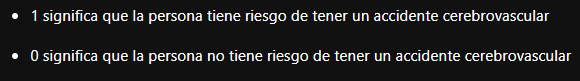

Es decir que con este modelo podemos decir con una probabilidad de 94% que un paciente no tiene riesgo y es inservible para decir que sí hay riesgo

#### 6.1.2.- Modelo de regresion logistica procesado; (balance de clases)

El principal problema de la version anterior de la regresion es que nunca detecta a la clase 1 "si hay riesgo", esto genera que los pacientes se despreocupen cuando en realidad si estan enfermos. Entonces queremos que el modelo tenga un balance entre clases, priorizando  la clase 1, es decir, minimizando los falsos positivos o dicho de forma analoga, maximizando rcall de la clase 1

Ahora intentaremos reducir los falsos negativos creando un modelo balanceado y vamos a contrastar ¿Qué modelo es mejor? Seleccionar alguno y optimizarlo mejorando los falsos negativos para el modelo seleccionado

In [15]:
# Crear modelo con balance de clases
classifier2 = LogisticRegression(class_weight='balanced', random_state=42)
classifier2.fit(X_train, y_train)
y_pred2  = classifier2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred2)

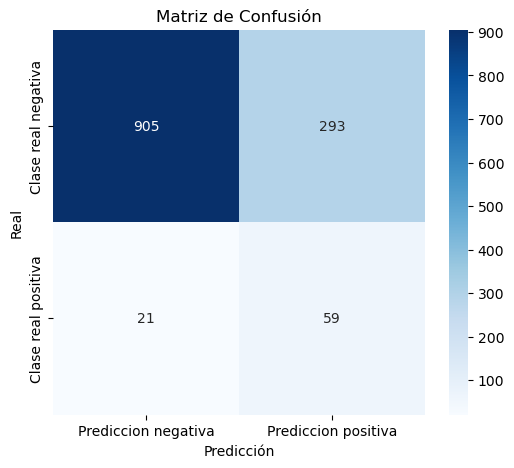

Matriz de Confusión:
[[905 293]
 [ 21  59]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1198
           1       0.17      0.74      0.27        80

    accuracy                           0.75      1278
   macro avg       0.57      0.75      0.56      1278
weighted avg       0.93      0.75      0.82      1278



In [19]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediccion negativa', 'Prediccion positiva'], yticklabels=['Clase real negativa', 'Clase real positiva'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred2)
print("\nReporte de Clasificación:")
print(report)

Aquí podemos hacer el mismo análisis que hicimos en el modelo sin procesar pero nos limitaremos a obtener algunas conclusiones directas por practicidad.

    - Vemos que el rcall De la clase positiva aumentó bastante en contraste con lo que bajó de la clase negativa.
    
    - Pero aún así seguimos teniendo un F 1 relativamente bajo en nuestro objetivo Que es priorizar la calidad de las predicciones en la clase 1
    
 Entonces en contraste con él modelo previo éste es mucho mejor pero lo optimizaremos intentando minimizar los falsos positivos con la curva roc

In [22]:
y_prob2 = classifier2.predict_proba(X_test)[:, 1]
y_prob2

array([0.05660989, 0.07712806, 0.08236204, ..., 0.79532174, 0.35486759,
       0.11165355])

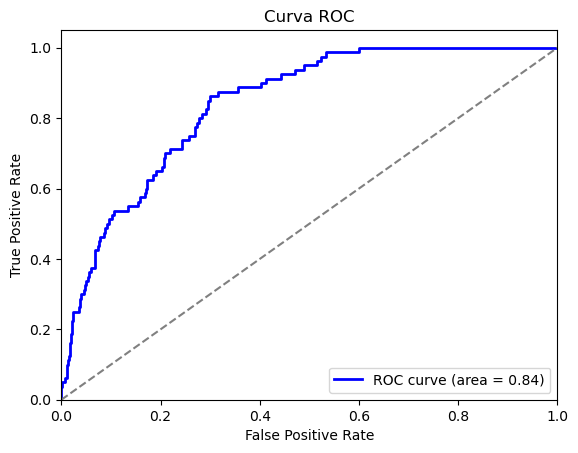

In [23]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

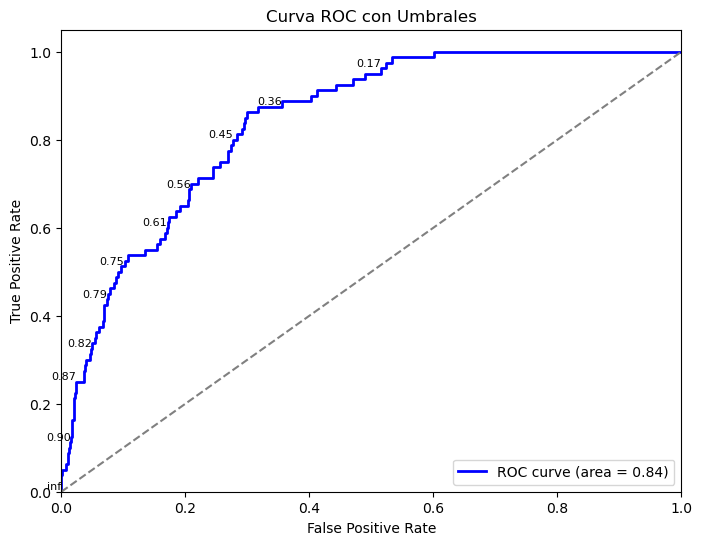

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes y_test y y_prob2
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Mostrar umbrales en el gráfico
for i in range(0, len(thresholds), max(1, len(thresholds) // 10)):
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC con Umbrales')
plt.legend(loc='lower right')
plt.show()

Nuestro objetivo es maximizar la tasa de verdaderos positivos o el rcall De la clase positiva, podemos tomar el umbral 0.36

In [25]:
# 1. Entrenar el modelo con class_weight='balanced'
classifier2 = LogisticRegression(class_weight='balanced', random_state=42)
classifier2.fit(X_train, y_train)

# 2. Obtener las probabilidades de la clase positiva (1)
y_probs2 = classifier2.predict_proba(X_test)[:, 1]  

# 3. Aplicar el umbral de 0.36
umbral = 0.36
y_pred2 = (y_probs2 >= umbral).astype(int)

# 4. Mostrar las predicciones con el nuevo umbral
y_pred2


array([0, 0, 0, ..., 1, 0, 0])

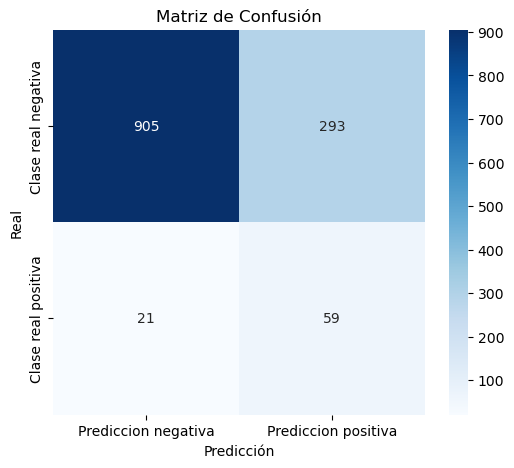

Matriz de Confusión:
[[905 293]
 [ 21  59]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.65      0.78      1198
           1       0.14      0.88      0.24        80

    accuracy                           0.66      1278
   macro avg       0.56      0.76      0.51      1278
weighted avg       0.93      0.66      0.75      1278



In [26]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediccion negativa', 'Prediccion positiva'], yticklabels=['Clase real negativa', 'Clase real positiva'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión:")
print(conf_matrix)

# Reporte de clasificación
report = classification_report(y_test, y_pred2)
print("\nReporte de Clasificación:")
print(report)

Ahora nos ocuparemos de minimizar los Falsos positivos no decir que sí cuando la verdad es que no.

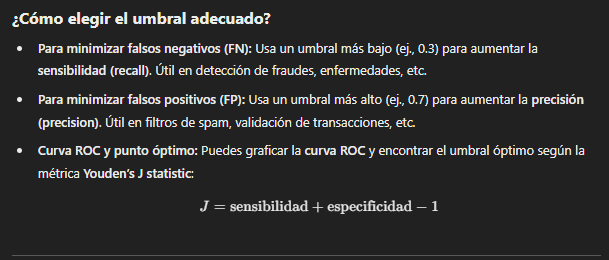

### 6.2.- Clasificación con árboles de decision

La elección de este Modelo es porque se supone maneja bien las clases desbalanceadas

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred  = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

### 6.1.1- Evaluar el modelo de regresion con clasificacion con arboles de decision

In [34]:
cm_tree = confusion_matrix(y_test, y_pred)
cm_tree

array([[1142,   56],
       [  68,   12]], dtype=int64)